In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import re
import emoji
import swifter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from deep_translator import GoogleTranslator
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')

### Preprocessing

In [3]:
df = pd.read_csv(r'./data/youtube_comments.csv')

In [4]:
df.head(2)

,Author,Comment,Published
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z


In [5]:
print('total baris', df.shape[0])
print('total kolom', df.shape[1])

total baris 10099
total kolom 3


In [6]:
# Cek missing value

df.isna().sum()

Author       3
Comment      0
Published    0
dtype: int64

In [7]:
# Cek duplikasi

df.duplicated().sum()

3

In [8]:
df_clean = df.copy()

In [9]:
# Menghandle Missing Value

df_clean = df_clean.dropna()
df_clean.isna().sum()

Author       0
Comment      0
Published    0
dtype: int64

In [10]:
# Menghandle Duplikasi

df_clean = df_clean.drop_duplicates()
df_clean.duplicated().sum()

0

In [11]:
# Fungsi untuk membersihkan data

def remove_emoji(text):
    if isinstance(text, str):
        return emoji.replace_emoji(text, replace='')
    else:
        return text

def clean_text(text):
    text = remove_emoji(text)
    if isinstance(text, str):
        # Mengubah ke lowercase
        text = text.lower()
        # Menghilangkan URL
        text = re.sub(r'@\w+|#\w+|http\S+', '', text)
        # Menghilangkan angka
        text = re.sub(r"\d+", '', text)
        # Menghilangkan mention dan hashtag
        text = re.sub(r"@\w+|#\w+", '', text)
        # Menghilangkan karakter non-alfabet
        text = re.sub(r"[^a-zA-Z\s]", '', text)
        # Menghilangkan spasi berlebih
        text = re.sub(r'\s+', ' ', text).strip()
        # Remove single character
        text = re.sub(r"\b[a-zA-Z]\b", "", text)
    return text

def correct_typo(text):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

def translate_text(text):
    translated = GoogleTranslator(source='en', target='id').translate(text)
    return translated

def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    return text

def apply_stemming(text):
    return stemmer.stem(text)

def tokenization(text):
    return word_tokenize(text)

In [12]:
df_clean['clean_comment'] = df_clean['Comment'].apply(clean_text)
df_clean.head(2)

,Author,Comment,Published,clean_comment
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z,zonasi gak berlaku di sekolah negeri favorit r...
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z,test mtk berapa jangan kelamaan mikirnya tapi wk


In [13]:
# df_clean['translate_text'] = df_clean['correct_typo'].apply(translate_text)
# df_clean.head(2)

In [14]:
file_path = "./data/normalisasi.xlsx"
data = pd.read_excel(file_path)
normalization_dict = dict(zip(data['before'], data['after']))

df_clean['correct_typo'] = df_clean['clean_comment'].apply(correct_typo)
df_clean.head(2)

,Author,Comment,Published,clean_comment,correct_typo
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z,zonasi gak berlaku di sekolah negeri favorit r...,zonasi tidak berlaku di sekolah negeri favorit...
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z,test mtk berapa jangan kelamaan mikirnya tapi wk,test mtk berapa jangan kelamaan mikirnya tapi wk


In [15]:
stop_words = set(stopwords.words('indonesian'))

df_clean['remove_stopwords'] = df_clean['correct_typo'].apply(remove_stopwords)
df_clean.head(2)

,Author,Comment,Published,clean_comment,correct_typo,remove_stopwords
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z,zonasi gak berlaku di sekolah negeri favorit r...,zonasi tidak berlaku di sekolah negeri favorit...,zonasi berlaku sekolah negeri favorit rela bay...
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z,test mtk berapa jangan kelamaan mikirnya tapi wk,test mtk berapa jangan kelamaan mikirnya tapi wk,test mtk mikirnya wk


In [16]:
df_clean['tokens'] = df_clean['remove_stopwords'].apply(tokenization)
df_clean.head(2)

,Author,Comment,Published,clean_comment,correct_typo,remove_stopwords,tokens
0,@ulfianaini,"Zonasi gak berlaku di sekolah negeri favorit, ...",2024-12-16T04:12:04Z,zonasi gak berlaku di sekolah negeri favorit r...,zonasi tidak berlaku di sekolah negeri favorit...,zonasi berlaku sekolah negeri favorit rela bay...,"[zonasi, berlaku, sekolah, negeri, favorit, re..."
1,@somecomfort,"test mtk, 7x8 berapa? jangan kelamaan mikirnya...",2024-12-15T08:06:03Z,test mtk berapa jangan kelamaan mikirnya tapi wk,test mtk berapa jangan kelamaan mikirnya tapi wk,test mtk mikirnya wk,"[test, mtk, mikirnya, wk]"


In [17]:
# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# df_clean['stem_comment'] = df_clean['tokens'].swifter.apply(apply_stemming)
# df_clean.head(2)

In [18]:
# Membuat Label

def get_sentiment(text):

    sentiment = TextBlob(text).sentiment

    if sentiment.polarity > 0.1:
        return 'positif'
    elif sentiment.polarity < -0.1:
        return 'negatif'
    else:
        return 'netral'

df_clean['label'] = df_clean['remove_stopwords'].apply(get_sentiment)

In [19]:
df_clean['label'].value_counts()

label
netral     9331
positif     472
negatif     290
Name: count, dtype: int64

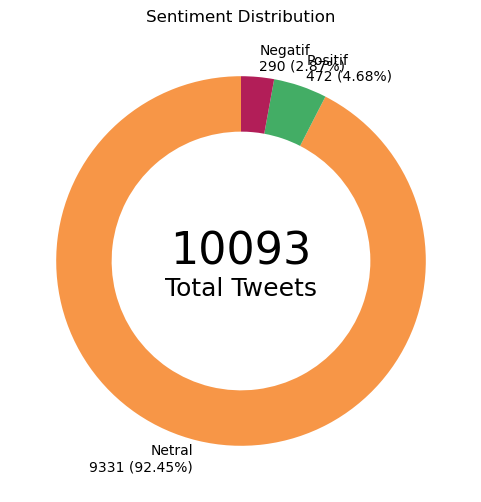

In [20]:
def plot_pie(data):

    pie_data = data.value_counts()
    color_map = {"positif": "#43AD65", "netral": "#F79647", "negatif": "#B21E58"}
    
    # Buat label
    labels = [
        (
            f"{str(pie_data.index[i]).title()}\n{pie_data.values[i]}"
            + f" ({round(pie_data.values[i] / sum(pie_data.values) * 100, 2)}%)"
        )
        for i in range(len(pie_data.values))
    ]

    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        pie_data.values,
        labels=labels,
        colors=[color_map.get(str(x).lower(), "#cccccc") for x in pie_data.index],
        wedgeprops={"width": 0.3},
        startangle=90
    )

    # Informasi total
    plt.title("Sentiment Distribution", fontsize=12)
    plt.text(0, 0.05, sum(pie_data.values), ha="center", va="center", fontsize=32)
    plt.text(0, -0.15, "Total Tweets", ha="center", va="center", fontsize=18)
    plt.show()

plot_pie(df_clean["label"])

In [21]:
df_clean.sample(10)

,Author,Comment,Published,clean_comment,correct_typo,remove_stopwords,tokens,label
1703,@anto11anto33,Tetap lebih bagus sistem pendidikan jaman dulu...,2024-10-26T23:17:30Z,tetap lebih bagus sistem pendidikan jaman dulu...,tetap lebih bagus sistem pendidikan zaman dulu...,bagus sistem pendidikan zaman neko negara ngan...,"[bagus, sistem, pendidikan, zaman, neko, negar...",netral
5212,@uwonkbreeder,"1. Game online tidak boleh ada di hp,<br>2. KU...",2024-10-15T16:20:45Z,game online tidak boleh ada di hpbr kurikulum ...,game online tidak boleh ada di hpbr kurikulum ...,game online hpbr kurikulum pakai sd tau kuriku...,"[game, online, hpbr, kurikulum, pakai, sd, tau...",negatif
1906,@swastianaekayunita3883,"Inspiiring bgt kak terimakasih infonya, tapi s...",2024-10-25T16:42:24Z,inspiiring bgt kak terimakasih infonya tapi sa...,inspiiring banget kakak terimakasih infonya ta...,inspiiring banget kakak terimakasih infonya ta...,"[inspiiring, banget, kakak, terimakasih, infon...",netral
5994,@mrezar6969,Kenapa guru sibuk ngurus PPG karena ada sejuml...,2024-10-14T04:51:07Z,kenapa guru sibuk ngurus ppg karena ada sejuml...,kenapa guru sibuk merawat ppg karena ada sejum...,guru sibuk merawat ppg nominal uang yg guru te...,"[guru, sibuk, merawat, ppg, nominal, uang, yg,...",netral
9539,@bimademahendra,Ini beneran sistem zonasi banyak dampak negati...,2024-10-10T20:03:12Z,ini beneran sistem zonasi banyak dampak negati...,ini benar sistem zonasi banyak dampak negatifn...,sistem zonasi dampak negatifnya magang guru ba...,"[sistem, zonasi, dampak, negatifnya, magang, g...",netral
2718,@ayumartha3928,"sebagai salah satu guru honorer, semua yang di...",2024-10-21T15:31:33Z,sebagai salah satu guru honorer semua yang dir...,sebagai salah satu guru honorer semua yang dir...,salah guru honorer dirangkum video miris perke...,"[salah, guru, honorer, dirangkum, video, miris...",netral
1743,@indrahermawan734,Kembalikan sperti sistem 90an<br>Ebta Ebtanas ...,2024-10-26T13:07:58Z,kembalikan sperti sistem anbrebta ebtanas terb...,kembalikan sperti sistem anbrebta ebtanas terb...,kembalikan sperti sistem anbrebta ebtanas terb...,"[kembalikan, sperti, sistem, anbrebta, ebtanas...",positif
1673,@ekapurwita1393,Gua dari awal udah ga setuju sistem ini. Zonas...,2024-10-27T02:40:19Z,gua dari awal udah ga setuju sistem ini zonasi...,aku dari awal sudah tidak setuju sistem ini zo...,setuju sistem zonasi lakukan kualitas sekolah ...,"[setuju, sistem, zonasi, lakukan, kualitas, se...",netral
4742,@ernita9050,Waaw... Gk bs berkata kata stlah menonton YouT...,2024-10-16T06:52:08Z,waaw gk bs berkata kata stlah menonton youtube...,waaw tidak bisa berkata kata setelah menonton ...,waaw menonton youtube fery brsegitu parahnya s...,"[waaw, menonton, youtube, fery, brsegitu, para...",netral
5240,@IslamistSocialist371,"Our nation is evolving, just backwards",2024-10-15T14:24:52Z,our nation is evolving just backwards,our nation is evolving just backwards,our nation is evolving just backwards,"[our, nation, is, evolving, just, backwards]",netral


In [22]:
df_clean.isna().sum()

Author              0
Comment             0
Published           0
clean_comment       0
correct_typo        0
remove_stopwords    0
tokens              0
label               0
dtype: int64

### Save dataset|

In [71]:
# Simpan file

df_clean.to_csv('./data/data_clean.csv', index=False) # data yang sudah bersih            